# **Office Solutions Company Insights**




**Goal:**

Utilize the given data set to provide insights on how the company could increase their profits/sales in the next years.





---



Initial importing of pandas, pyplot, and seaborn libraries.

Loading Excel file.

In [10]:
# imports pandas, matplitlib, and seaborn
# loads excel file via path and chooses "Orders" sheet from excel file
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
df = pd.ExcelFile('/content/TableauSalesData.xlsx')
SalesData = df.parse("Orders")
#print(SalesData.columns)
#display(SalesData.head(20))

First, I wanted to see how each category of product performed over the four years.

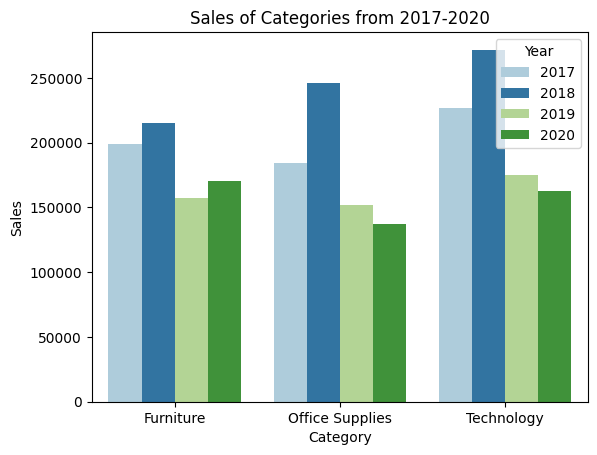

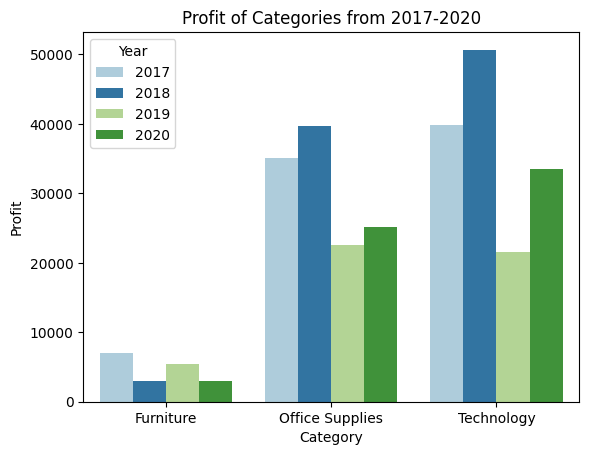

In [11]:
# Displays profit and sales of each category, each bar representing a year from 2017 - 2020

# Creates Category df with year column
YearOverallProfitSalesCat = SalesData.copy()
YearOverallProfitSalesCat['Year'] = YearOverallProfitSalesCat['Order Date'].dt.year
# Finds unique years and categories
Years = YearOverallProfitSalesCat.Year.unique()
Cats = YearOverallProfitSalesCat.Category.unique()

df = pd.DataFrame()
# Iterates over years to check sales/profit of each category for each year
# Displays bar graph of each year showing sales/profit of each category
for year in Years:
  OverallCatYear = YearOverallProfitSalesCat.loc[YearOverallProfitSalesCat['Year'] == year]
  RefinedOverallCatYear = OverallCatYear[['Category', 'Profit', 'Sales','Year']]
  CatOverallSalesProfit = RefinedOverallCatYear.groupby('Category').agg({'Sales': 'sum', 'Profit': 'sum', 'Year':'mean'}).round().sort_values('Category')
  df = df.append(CatOverallSalesProfit)
df = df.reset_index()
df = df.sort_values('Category')
df['Year'] = df['Year'].astype(int)

salesbar = sns.barplot(data= df, x = 'Category', y = 'Sales', hue ='Year', palette = 'Paired').set(title = 'Sales of Categories from 2017-2020')
plt.show()
profitbar = sns.barplot(data= df, x = 'Category', y = 'Profit', hue ='Year', palette = 'Paired').set(title = 'Profit of Categories from 2017-2020')
plt.show()

Here, I noticed that, although furniture sales were on par with office supplies and technology categories, its profits were far below.

This can be seen further in the total profit and sales of each category.

In [12]:
# Total profit and sales of each category
OverallProfitSalesCat = SalesData[['Category','Profit','Sales']]
TotalOverallProfitSalesCat = SalesData.groupby('Category').sum().round(2)
TotalOverallProfitSalesCat = TotalOverallProfitSalesCat[['Profit','Sales']]
print("Category Total Profit and Sales")
print('*'*35)
display(TotalOverallProfitSalesCat)

Category Total Profit and Sales
***********************************


,Profit,Sales
Category,,
Furniture,18451.27,741999.80
Office Supplies,122490.80,719047.03
Technology,145454.95,836154.03


I was now interested in how the products inside furniture compared to products from office supplies and technology, so I took a look at the top 5 selling products from each category.

In [13]:
# Top five profitable products in each category along with its sales
CatProducts = SalesData[['Category','Product Name','Profit','Sales']]
Cats = CatProducts.Category.unique()
for cat in Cats:
  FurnCatProducts = CatProducts.loc[CatProducts['Category'] == cat]
  TotalCatProducts = FurnCatProducts.groupby('Product Name').sum().sort_values('Profit', ascending = False)
  print('Top 5 products in ' + cat)
  print('*' * 40)
  display(TotalCatProducts.head(5))

Top 5 products in Furniture
****************************************


,Profit,Sales
Product Name,,
"Hon Deluxe Fabric Upholstered Stacking Chairs, Rounded Back",1927.4420,10637.528
Global Deluxe High-Back Manager's Chair,1558.5910,8665.194
Hon Pagoda Stacking Chairs,1540.7040,6483.796
Hon 4070 Series Pagoda Armless Upholstered Stacking Chairs,1388.6348,8430.997
Office Star - Professional Matrix Back Chair with 2-to-1 Synchro Tilt and Mesh Fabric Seat,1305.6456,8774.500


Top 5 products in Technology
****************************************


,Profit,Sales
Product Name,,
Canon imageCLASS 2200 Advanced Copier,25199.9280,61599.824
Hewlett Packard LaserJet 3310 Copier,6983.8836,18839.686
Canon PC1060 Personal Laser Copier,4570.9347,11619.834
"HP Designjet T520 Inkjet Large Format Printer - 24"" Color",4094.9766,18374.895
Ativa V4110MDD Micro-Cut Shredder,3772.9461,7699.890


Top 5 products in Office Supplies
****************************************


,Profit,Sales
Product Name,,
Fellowes PB500 Electric Punch Plastic Comb Binding Machine with Manual Bind,7753.0390,27453.384
Ibico EPK-21 Electric Binding System,3345.2823,15875.916
Honeywell Enviracaire Portable HEPA Air Cleaner for 17' x 22' Room,3247.0200,11304.440
Fellowes PB300 Plastic Comb Binding Machine,2518.0551,8070.192
Ibico Ibimaster 300 Manual Binding System,2318.3370,7985.383


The top selling furniture products had generally high sales, but, their profits did not compare to Technology's and Office Supplies' top selling products. Furniture profits of the individual products did not exceed \$2000, where there other categories top selling products went far beyond \$2000. 

In [22]:
# Average discount, profit, and sales for each category
CatDiscount = SalesData[['Category','Product Name','Discount','Profit','Sales']]
OverallCatAvgDiscount = pd.DataFrame()
Cats = CatDiscount.Category.unique()
for cat in Cats:
  CatAvgDiscount = CatDiscount.loc[CatDiscount['Category'] == cat]
  TotalCatProducts = CatAvgDiscount.groupby('Category').mean()
  OverallCatAvgDiscount = OverallCatAvgDiscount.append(TotalCatProducts)
display(OverallCatAvgDiscount)

,Discount,Profit,Sales
Category,,,
Furniture,0.173923,8.699327,349.834887
Technology,0.132323,78.752002,452.709276
Office Supplies,0.157285,20.327050,119.324101


Here wew can see:

*   Furniture has a higher average discount rate than the others
*   Furniture's average profit for each order was lowest of the three
<br><br>
---
<br><br>
**Conclusion:**

The furniture category should be a main focus of concern and changes when looking to create more profit for the company.